# ACF and PACF

# 1. Imports

## 1.1 Packages

In [1]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm


## 1.2 Options

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sys.path.append('../src')

from velib_prediction.pipelines.train_model.nodes import (  # noqa: E402
    get_split_train_val_cv,
)


## 1.3 Datasets

In [4]:
df_train = pd.read_parquet("../data/04_feature/df_feat_train.parquet")
df_train.sample(2)

,idx,stationcode,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,code_insee_commune,duedate_year,duedate_month,duedate_day,duedate_weekday,duedate_weekend
3,111041730275882,11104,1,20,16,3,1,2,1,1,2024-10-30 08:11:22+00:00,75056,2024,10,30,2,0
0,161071730218083,16107,1,35,32,3,0,3,1,1,2024-10-29 16:08:03+00:00,75056,2024,10,29,1,0


# 2. Prepare datasets

In [5]:
df_train.rename(columns={"numbikesavailable": "target"}, inplace=True)

In [6]:
list_df = get_split_train_val_cv(df_train, n_splits=3)

In [7]:
len(list_df)

3

In [8]:
df = list_df[0][0]
df['duedate'] = df['duedate'].dt.strftime('%Y-%m-%d %H')

In [9]:
df.sample(5)

,idx,stationcode,is_installed,capacity,numdocksavailable,target,mechanical,ebike,is_renting,is_returning,duedate,code_insee_commune,duedate_year,duedate_month,duedate_day,duedate_weekday,duedate_weekend
244,70021730645431,7002,1,35,26,9,5,4,1,1,2024-11-03 14,75056,2024,11,3,6,1
207,210101729727660,21010,1,25,2,22,13,9,1,1,2024-10-23 23,92012,2024,10,23,2,0
191,90201730008873,9020,1,21,20,1,0,1,1,1,2024-10-27 06,75056,2024,10,27,6,1
348,20221730171046,2022,1,35,31,2,1,1,1,1,2024-10-29 03,75056,2024,10,29,1,0
771,90201729821482,9020,1,21,20,1,0,1,1,1,2024-10-25 01,75056,2024,10,25,4,0


# 3. ACF and PACF

In [10]:
feat_date = "duedate"

/var/folders/q1/n9jt1sqj3976rqf2zn88_qpc0000gn/T/ipykernel_73891/2107576776.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_analyze = df.loc[df["stationcode"].isin(station_codes_to_analyze)][(df["target"].notnull())].groupby([feat_date, "stationcode"])["target"].mean().reset_index().set_index(feat_date)


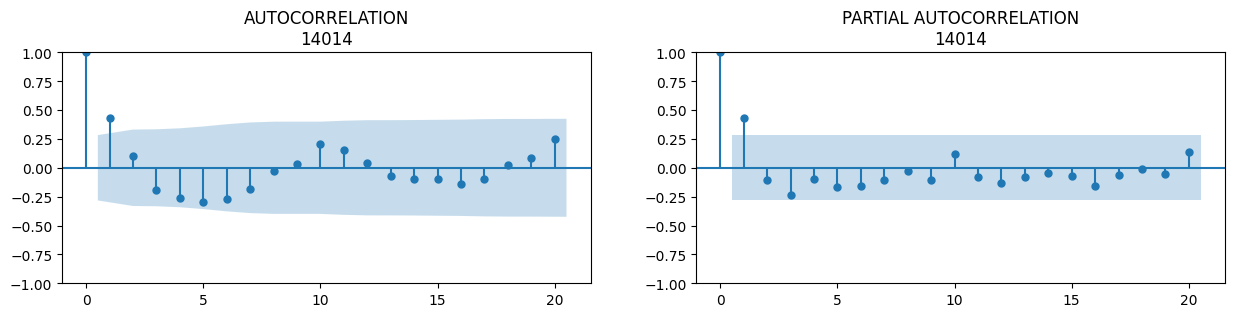

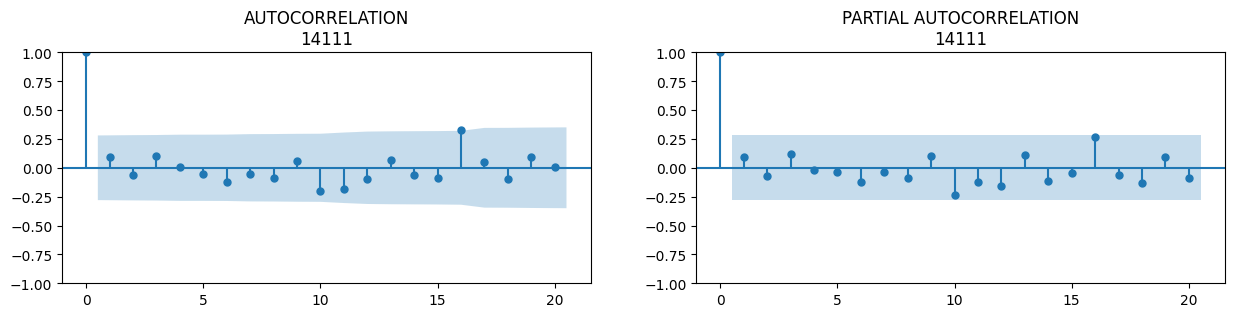

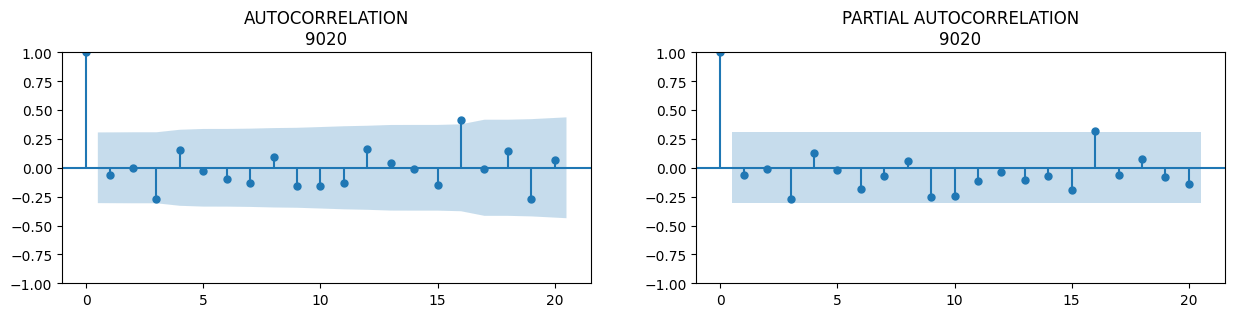

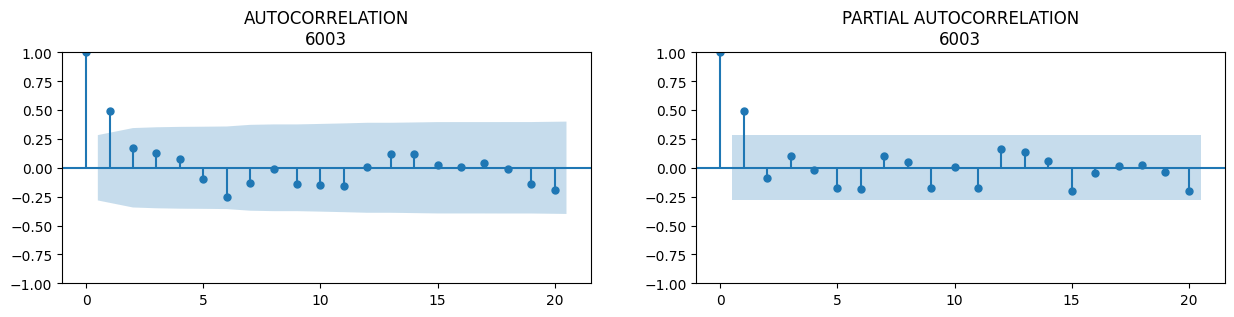

In [24]:
# Select random ids
station_codes_to_analyze = df["stationcode"].unique()[:4]

df_analyze = df.loc[df["stationcode"].isin(station_codes_to_analyze)][(df["target"].notnull())].groupby([feat_date, "stationcode"])["target"].mean().reset_index().set_index(feat_date)
for num, i in enumerate(df_analyze["stationcode"].unique()):
    try:
        fig, ax = plt.subplots(1,2, figsize=(15,3))
        temp = df_analyze[(df_analyze["stationcode"] == i)]
        sm.graphics.tsa.plot_acf(temp["target"], lags=20, ax=ax[0], title="AUTOCORRELATION\n" + i)
        sm.graphics.tsa.plot_pacf(temp["target"], lags=20, ax=ax[1], title="PARTIAL AUTOCORRELATION\n" + i)
    except Exception:
        pass